#### Analysis of Covid Mortality in Chicago
This analysis shows that beginning in March 2022, covid mortality, defined as deaths per hospitalization, dropped sharply and has remained at historic lows. As a measure of mortality, we define mortality rate to be mortalities per hospitalization over the past 30 days


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
csv_endpoint='https://data.cityofchicago.org/resource/naz8-j4nc.csv'

chicago_covid=pd.read_csv(csv_endpoint)
chicago_covid.columns

Index(['lab_report_date', 'cases_total', 'deaths_total',
       'hospitalizations_total', 'cases_age_0_17', 'cases_age_18_29',
       'cases_age_30_39', 'cases_age_40_49', 'cases_age_50_59',
       'cases_age_60_69', 'cases_age_70_79', 'cases_age_80_',
       'cases_age_unknown', 'cases_female', 'cases_male',
       'cases_unknown_gender', 'cases_latinx', 'cases_asian_non_latinx',
       'cases_black_non_latinx', 'cases_white_non_latinx',
       'cases_other_non_latinx', 'cases_unknown_race_eth', 'deaths_0_17_yrs',
       'deaths_18_29_yrs', 'deaths_30_39_yrs', 'deaths_40_49_yrs',
       'deaths_50_59_yrs', 'deaths_60_69_yrs', 'deaths_70_79_yrs',
       'deaths_80_yrs', 'deaths_unknown_age', 'deaths_female', 'deaths_male',
       'deaths_unknown_gender', 'deaths_latinx', 'deaths_asian_non_latinx',
       'deaths_black_non_latinx', 'deaths_white_non_latinx',
       'deaths_other_non_latinx', 'deaths_unknown_race_eth',
       'hospitalizations_age_0_17', 'hospitalizations_age_18_29',
   

Source: https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Cases-Deaths-and-Hospitalizations/naz8-j4nc

Deaths are those occurring among cases based on the day of death. Hospitalizations are based on the date of first hospitalization. Only one hospitalization is counted for each case. Demographic data are based on what is reported by medical providers or collected by CDPH during follow-up investigation.

In [ ]:
hosp_columns=chicago_covid.filter(regex='hosp').columns
hosp_columns

age_ranges=hosp_columns.str[16:]
age_ranges

Index(['_total', '_age_0_17', '_age_18_29', '_age_30_39', '_age_40_49',
       '_age_50_59', '_age_60_69', '_age_70_79', '_age_80_', '_age_unknown',
       '_female', '_male', '_unknown_gender', '_latinx', '_asian_non_latinx',
       '_black_non_latinx', '_white_non_latinx', '_other_race_non_latinx',
       '_unknown_race_ethnicity'],
      dtype='object')

In [ ]:
chicago_covid.rename(columns={'lab_report_date':'date'},inplace=True)
chicago_covid['date']=pd.to_datetime(chicago_covid['date'])

chicago_covid.sort_values(by=['date'],inplace=True)

In [ ]:
new_deaths_col_map={'deaths_unknown_age':'deaths_age_unknown',\
                    'deaths_0_17_yrs':'deaths_age_0_17',\
                    'deaths_18_29_yrs':'deaths_age_18_29',\
                    'deaths_30_39_yrs':'deaths_age_30_39',\
                    'deaths_40_49_yrs':'deaths_age_40_49',\
                    'deaths_50_59_yrs':'deaths_age_50_59',\
                    'deaths_60_69_yrs':'deaths_age_60_69',\
                    'deaths_70_79_yrs':'deaths_age_70_79',\
                    'deaths_80_yrs':'deaths_age_80_',\
                    'deaths_unknown_age':'deaths_age_unknown'}

chicago_covid.rename(columns=new_deaths_col_map,inplace=True)
chicago_covid.columns

Index(['date', 'cases_total', 'deaths_total', 'hospitalizations_total',
       'cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39',
       'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69',
       'cases_age_70_79', 'cases_age_80_', 'cases_age_unknown', 'cases_female',
       'cases_male', 'cases_unknown_gender', 'cases_latinx',
       'cases_asian_non_latinx', 'cases_black_non_latinx',
       'cases_white_non_latinx', 'cases_other_non_latinx',
       'cases_unknown_race_eth', 'deaths_age_0_17', 'deaths_age_18_29',
       'deaths_age_30_39', 'deaths_age_40_49', 'deaths_age_50_59',
       'deaths_age_60_69', 'deaths_age_70_79', 'deaths_age_80_',
       'deaths_age_unknown', 'deaths_female', 'deaths_male',
       'deaths_unknown_gender', 'deaths_latinx', 'deaths_asian_non_latinx',
       'deaths_black_non_latinx', 'deaths_white_non_latinx',
       'deaths_other_non_latinx', 'deaths_unknown_race_eth',
       'hospitalizations_age_0_17', 'hospitalizations_age_18_29',
       'hospi

In [ ]:
for suffx in age_ranges:
  chicago_covid['mort_rate'+suffx+'_30d']=chicago_covid['deaths'+suffx].rolling(30).sum()/chicago_covid['hospitalizations'+suffx].rolling(30).sum()

chicago_covid['hosp_30d']=chicago_covid['hospitalizations_total'].rolling(30).sum()
chicago_covid['deaths_30d']=chicago_covid['deaths_total'].rolling(30).sum()

KeyError: ignored

In [ ]:
mort_rate_cols=chicago_covid.filter(regex='mort_rate_age').columns
mort_rate_cols

Index(['mort_rate_age_0_17_30d', 'mort_rate_age_18_29_30d',
       'mort_rate_age_30_39_30d', 'mort_rate_age_40_49_30d',
       'mort_rate_age_50_59_30d', 'mort_rate_age_60_69_30d',
       'mort_rate_age_70_79_30d', 'mort_rate_age_80__30d',
       'mort_rate_age_unknown_30d'],
      dtype='object')

In [ ]:
chicago_covid.filter(regex='mort_rate').columns

Index(['mort_rate_total_30d', 'mort_rate_age_0_17_30d',
       'mort_rate_age_18_29_30d', 'mort_rate_age_30_39_30d',
       'mort_rate_age_40_49_30d', 'mort_rate_age_50_59_30d',
       'mort_rate_age_60_69_30d', 'mort_rate_age_70_79_30d',
       'mort_rate_age_80__30d', 'mort_rate_age_unknown_30d',
       'mort_rate_female_30d', 'mort_rate_male_30d',
       'mort_rate_unknown_gender_30d', 'mort_rate_latinx_30d',
       'mort_rate_asian_non_latinx_30d', 'mort_rate_black_non_latinx_30d',
       'mort_rate_white_non_latinx_30d'],
      dtype='object')

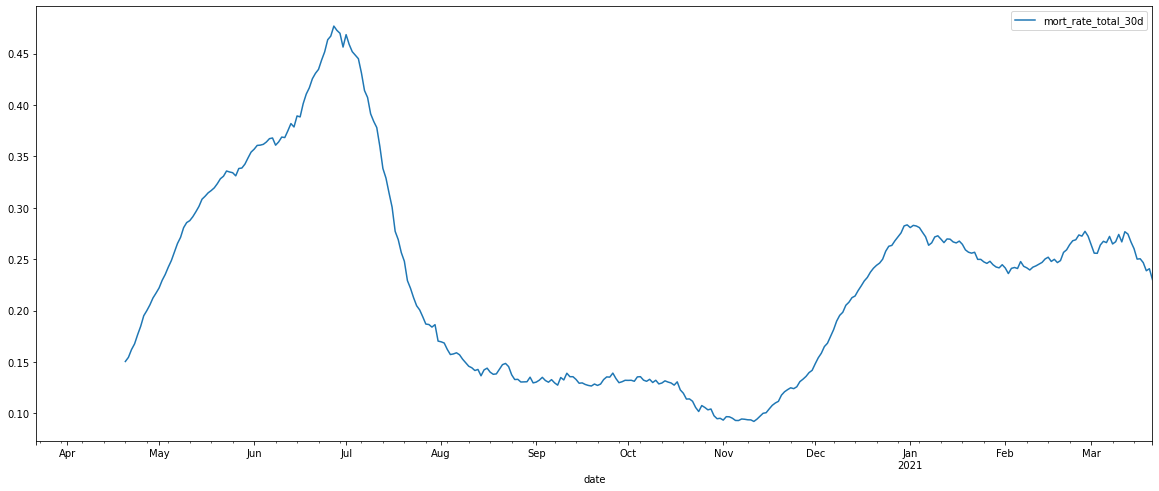

In [ ]:
# Rolling 30 days: deaths/hospitalizations
# Early in the pandemic, over 30% of hospitalizations resulted in death
ax=chicago_covid.head(365).plot(x='date',y='mort_rate_total_30d',figsize=(20,8))

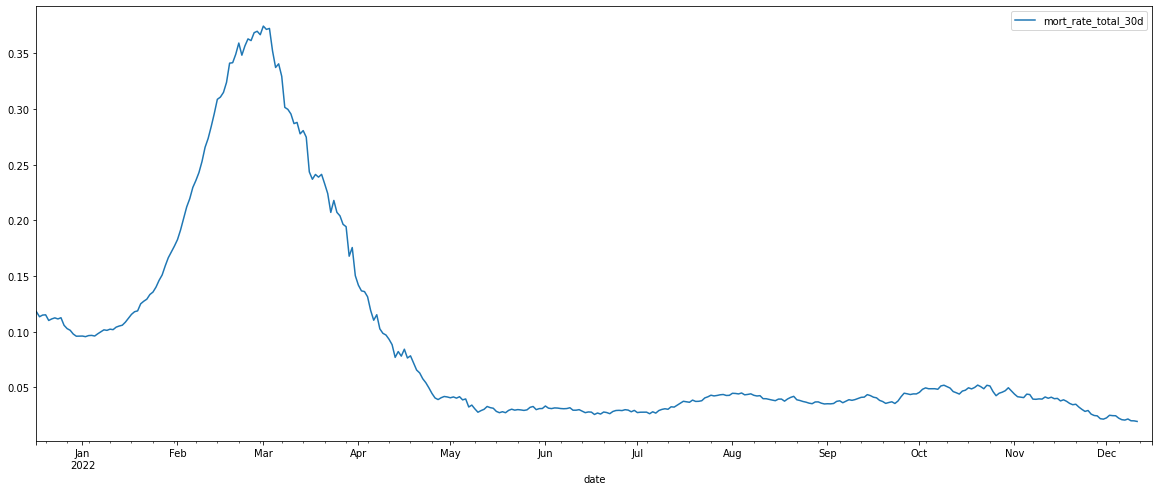

In [ ]:
# Here we see that mortality dropped sharply from March-May 2022 and has remained at historic lows
ax=chicago_covid.tail(365).plot(x='date',y='mort_rate_total_30d',figsize=(20,8))

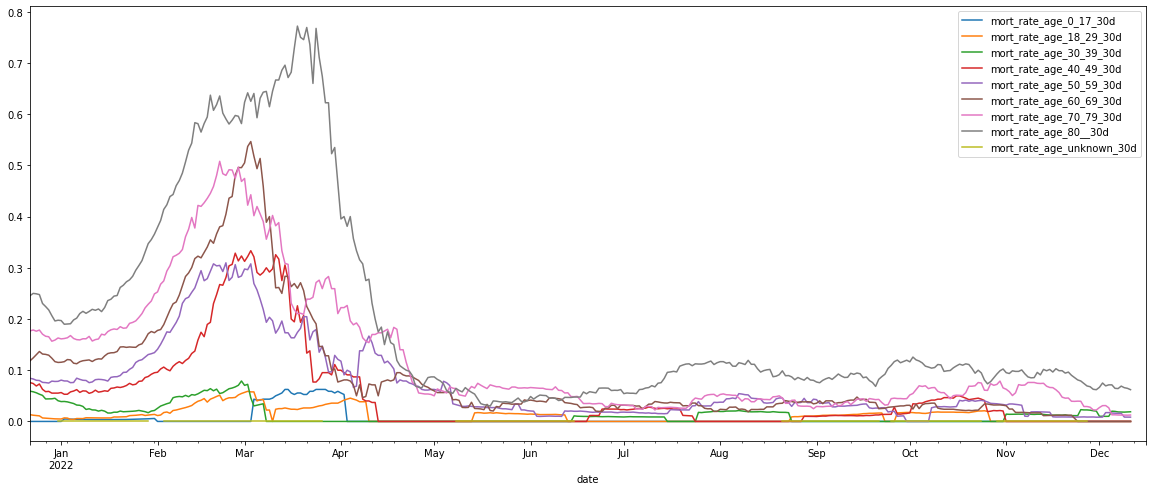

In [ ]:

ax=chicago_covid.tail(360).plot(x='date',y=mort_rate_cols,figsize=(20,8))

Text(0.5, 1.0, 'mort rate 30day')

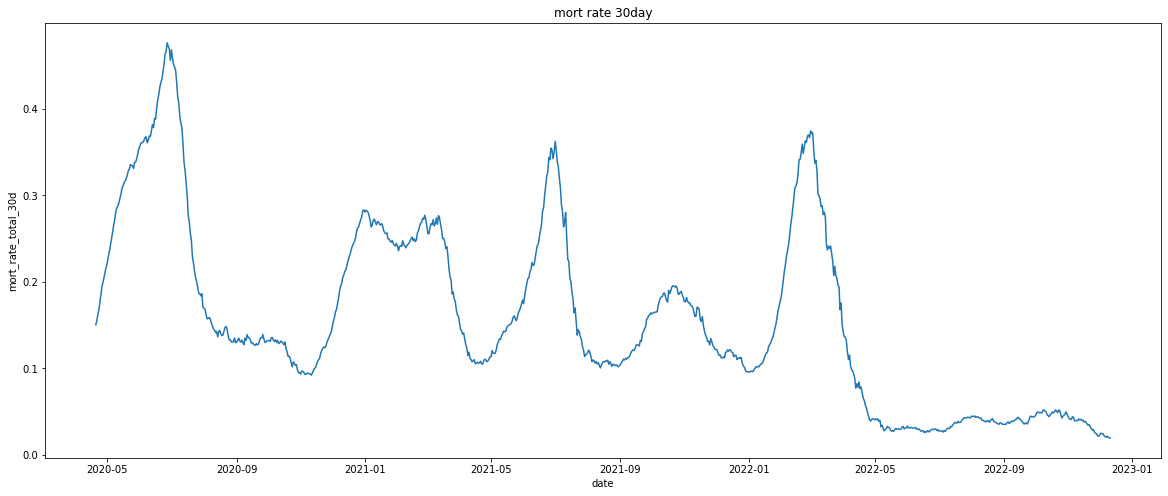

In [ ]:
# from march through may 2022, mortality rate dropped sharply
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=chicago_covid,y='mort_rate_total_30d',x='date')
#ax=sns.lineplot(data=chicago_covid.tail(330),y='mort_rate_30d',x='date')
ax.set_title('mort rate 30day')

In [ ]:
chicago_covid.columns

Index(['date', 'cases_total', 'deaths_total', 'hospitalizations_total',
       'cases_age_0_17', 'cases_age_18_29', 'cases_age_30_39',
       'cases_age_40_49', 'cases_age_50_59', 'cases_age_60_69',
       'cases_age_70_79', 'cases_age_80_', 'cases_age_unknown', 'cases_female',
       'cases_male', 'cases_unknown_gender', 'cases_latinx',
       'cases_asian_non_latinx', 'cases_black_non_latinx',
       'cases_white_non_latinx', 'cases_other_non_latinx',
       'cases_unknown_race_eth', 'deaths_age_0_17', 'deaths_age_18_29',
       'deaths_age_30_39', 'deaths_age_40_49', 'deaths_age_50_59',
       'deaths_age_60_69', 'deaths_age_70_79', 'deaths_age_80_',
       'deaths_age_unknown', 'deaths_female', 'deaths_male',
       'deaths_unknown_gender', 'deaths_latinx', 'deaths_asian_non_latinx',
       'deaths_black_non_latinx', 'deaths_white_non_latinx',
       'deaths_other_non_latinx', 'deaths_unknown_race_eth',
       'hospitalizations_age_0_17', 'hospitalizations_age_18_29',
       'hospi

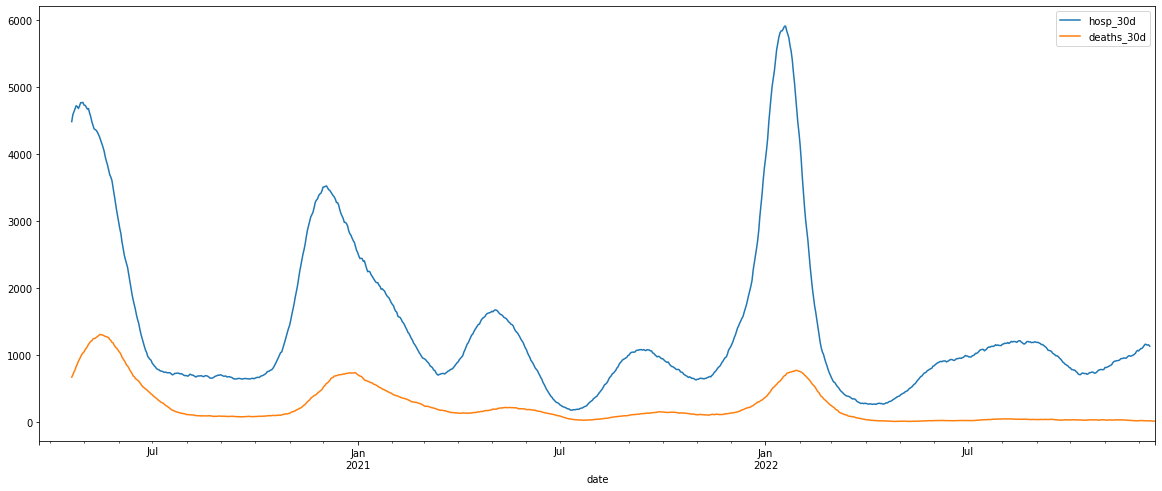

In [ ]:

chicago_covid['hosp_30d']=chicago_covid['hospitalizations_total'].rolling(30).sum()
chicago_covid['deaths_30d']=chicago_covid['deaths_total'].rolling(30).sum()

ax=chicago_covid.plot(y=['hosp_30d','deaths_30d'],x='date',figsize=(20,8))